# Assignment 4
## Problem Statement
Try implementing SIMPLE LINEAR REGRESSION on boston dataset, Use feature “LSTAT” i.e ‘lower status of the population’ to map with the values of prices.

Hint : X = df.LSTAT 
	   y = df.price
#### Submission by Vinayak Jaiwant(vjaiwantx@gmail.com)

##### Step 1 :Importing Libraries

In [81]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
import pandas as pd
import matplotlib.pyplot as plt
import math


#### Step 2: Loading the Dataset and Describing the data

In [59]:
ds=load_boston()
print(ds.DESCR)


.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

#### Loading Feature Names

In [31]:

cols=ds.feature_names
print(cols)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [32]:
df=pd.DataFrame(ds.data)
df.columns=cols
print(df)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       1

#### Printing Columns along with their names

In [35]:
df['price']=ds.target
print(df)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  price  
0       15.3  396.90   4.98   24.0  
1       17.8  396.90   9.

In [14]:
print(df['LSTAT'])

0      4.98
1      9.14
2      4.03
3      2.94
4      5.33
       ... 
501    9.67
502    9.08
503    5.64
504    6.48
505    7.88
Name: LSTAT, Length: 506, dtype: float64


In [36]:
print(df['price'])

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: price, Length: 506, dtype: float64


#### Reshaping data to 2D Array and assigning them to the variables

In [53]:
X=np.array(df['LSTAT'])
y=np.array(df['price'])
y=y.reshape(-1,1)
X=X.reshape(-1,1)

#### Plotting a Histogram to study the pricing distribution

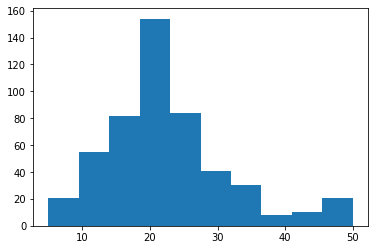

In [57]:
plt.hist(y,bins=10)
plt.show()

### Obseravation from the above plotted histogram
_We can observe that the pricing between 20 and 25 is observed to have a high number this means that, most people who are observed and recorded in this dataset are said to have purchased their home at this price range.This price range is neither too cheaep nor too expensive_.


In [61]:
print(df['price'].describe())

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: price, dtype: float64


### Post-Step splitting data to 80:20 ratio
#### i.e 80 for training 20 for testing 

In [67]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(404, 1)
(404, 1)
(102, 1)
(102, 1)


### Step 4: Preparing the Linear Regression Model

In [69]:
lin_reg=LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Storing the predicted values to y_predict

In [71]:
y_predict=lin_reg.predict(X_test)

### Informal representation of predicted data vs actual data using Scatter and Line Plot.

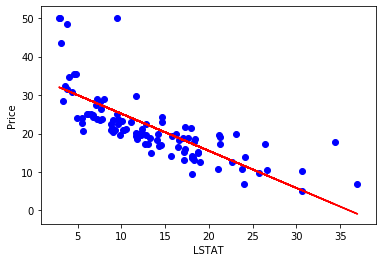

In [86]:
plt.plot(X_test,y_predict,label='Predicted Line',color='r')
plt.scatter(X_test,y_test,label='Actual Line',color='b')
plt.xlabel('LSTAT')
plt.ylabel('Price')
plt.show()

_As we can observe the distribution of predicted values and the actual values we can calculate their variation by using the error function, now we will be using RMSE (Root Mean Square Error) to calculate their Error.
We would be also using R2 Score to determine whether the model is being perfectly fit or not._


In [83]:
mse = mean_squared_error(y_test,y_predict)
r2=r2_score(y_test,y_predict)
print('RMSE: {}'.format(math.sqrt(mse)))
print('R2: {}'.format(r2))

RMSE: 5.789606996393182
R2: 0.5429180422970386
